<a href="https://colab.research.google.com/github/OksanaBut77/TFM/blob/main/TFM_Timestamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
import os
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataset inicial

In [88]:
df = pd.read_excel("/content/drive/MyDrive/TFM/Data set of Member Info.xlsx")
df.head()

,id,card_id,member_date,password,phone,sex,birthday,point,sfz,address,...,county_code,street_code,fate21,fate22,fate23,fate24,fate25,value_level,active_level,nick_name
0,1,1936560,NaN,123456,136opaq7233,男,1968-12-01,0.0,510224fardcdpq4379,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,NaN
1,2,3208730,NaN,123456,135omrc0269,男,1954-07-24,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,NaN
2,3,4053650,NaN,123456,157ebob6164,女,2016-09-02,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,NaN
3,4,4053950,NaN,123456,159rmrp8106,女,1951-09-13,0.0,510223oarqqroh1425,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,NaN
4,5,4133810,NaN,123456,139oeqn2724,男,2015-12-28,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,NaN


In [89]:
nan_percentages = (df.isna().mean() * 100).sort_values(ascending=False)
print(nan_percentages["last_consume_time"])

57.86


In [90]:
df['last_consume_time'] = pd.to_datetime(df['last_consume_time'], errors='coerce')

In [91]:
# Eliminar nan
df = df.dropna(subset=['last_consume_time'])

# Ordenar por fecha
df = df.sort_values(by='last_consume_time')

fecha_min = df['last_consume_time'].min()
fecha_max = df['last_consume_time'].max()

print("Oldest date:", fecha_min)
print("Most recent date:", fecha_max)

# Diferencias entre fechas consecutivas
diferencias = df['last_consume_time'].diff().dropna()

frecuencia = diferencias.mode()[0]
print("Most common frequency between records:", frecuencia)

Oldest date: 2016-01-01 12:41:11
Most recent date: 2021-12-12 21:53:18
Most common frequency between records: 0 days 00:00:14


In [92]:
df['last_consume_time'].count()

np.int64(4214)

In [93]:
df['year'] = df['last_consume_time'].dt.year

In [94]:
df['fecha'] = df['last_consume_time'].dt.date

In [95]:
# Agrupar por fecha
registros_por_dia = df.groupby('fecha').size()

In [96]:
media_diaria = registros_por_dia.mean()
print(f"Average number of registrations per day: {media_diaria:.2f}")

Average number of registrations per day: 3.12


In [97]:
usuarios_por_año = df.groupby('year')['card_id'].nunique()
print(usuarios_por_año)

year
2016     903
2017     322
2018     266
2019     312
2020     362
2021    2049
Name: card_id, dtype: int64


In [98]:
# Filtrar solo 2016
df_2016 = df[df['last_consume_time'].dt.year == 2016]

# Contar por día
conteo_2016 = df_2016.groupby(df_2016['last_consume_time'].dt.date).size().sort_values(ascending=False)

print(conteo_2016.head(10))

last_consume_time
2016-01-02    196
2016-01-01    128
2016-09-03     17
2016-09-02     17
2016-09-05     14
2016-06-17     12
2016-06-19     10
2016-09-01      9
2016-09-04      9
2016-09-12      8
dtype: int64


Esto no es un comportamiento normal para datos longitudinales capturados automáticamente. Muy probablemente se trata de:
Importación inicial o prueba del sistema (cuando empezó a registrar).
Carga masiva o error de backfill al migrar datos.

In [99]:
# Convertir a string por si hay problemas de formato
df = df[~df['last_consume_time'].dt.date.isin([pd.to_datetime("2016-01-01").date(),
                                               pd.to_datetime("2016-01-02").date()])]

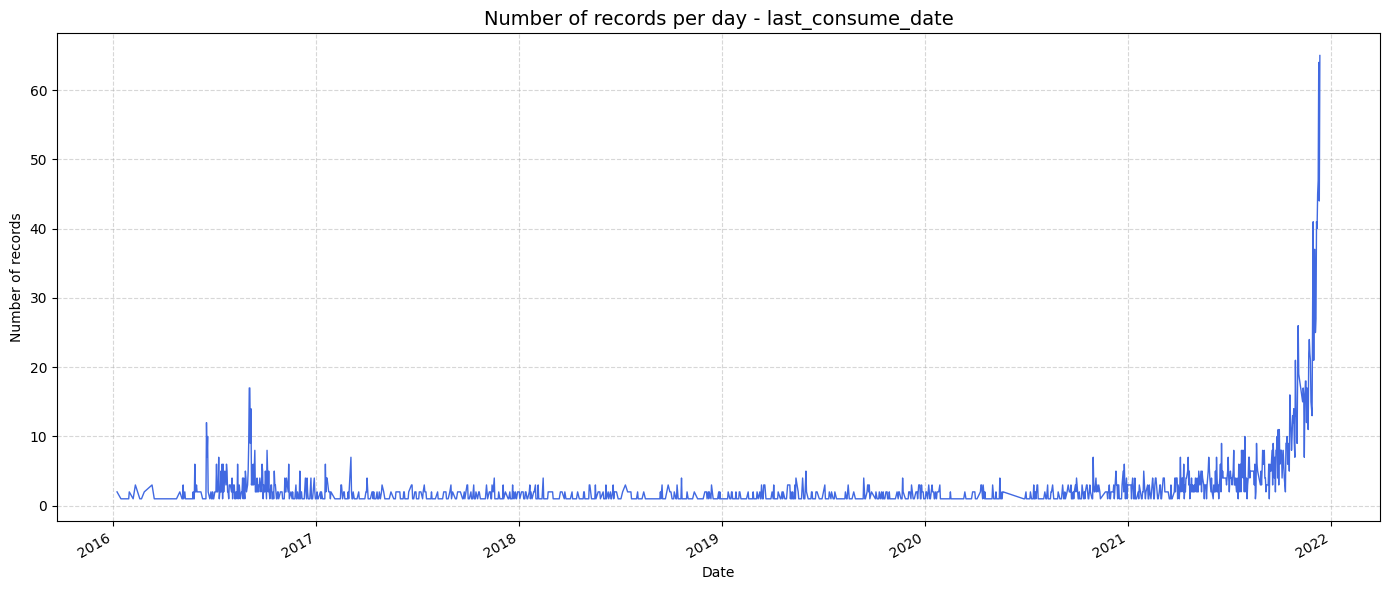

In [100]:
# Agrupar por fecha
registros_por_dia = df.groupby('fecha').size()

# Convertir el índice para graficar
registros_por_dia.index = pd.to_datetime(registros_por_dia.index)

plt.figure(figsize=(14, 6))
registros_por_dia.plot(linewidth=1, color='royalblue')

plt.title('Number of records per day - last_consume_date', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Number of records')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

------------------

In [101]:
# Diferencias entre fechas consecutivas
diferencias2 = df['last_consume_time'].diff().dropna()

frecuencia = diferencias2.mode()[0]
print("Most common frequency between records:", frecuencia)

Most common frequency between records: 0 days 00:11:06
